<center><h2><b>10. Brownian Motion</b></h2></center>
<center><h4>Exercise 10.3 from Computational Physics by Mark Newman</h4></center>
<center><h4>Code Author: Pratiksha Balasaheb Gaikwad</h4></center>
<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<hr style="height:2px;border-width:0;color:blue;background-color:blue">


**Exercise 10.3 Brownian Motion**

Brownian motion is the motion of a particle, such as a smoke or dust particle, in a gas,
as it is buffeted by random collisions with gas molecules. Make a simple computer
simulation of such a particle in two dimensions as follows. The particle is confined to
a square grid or lattice L x L squares on a side, so that its position can be represented
by two integers i, j = 0 ... L - 1. It starts in the middle of the grid. On each step of
the simulation, choose a random direction-up, down, left, or right-and move the
particle one step in that direction. This process is called a random walk. The particle is
not allowed to move outside the limits of the lattice-if it tries to do so, choose a new
random direction to move in.  

Write a program to perform a million steps of this process on a lattice with L = 101
and make an animation on the screen of the position of the particle. (We choose an odd
length for the side of the square so that there is one lattice site exactly in the center.)  

Note: The visual package doesn't always work well with the random package, but
if you import functions from visual first, then from random, you should avoid prob-
lems.

**Modifications:**
- Have your code keep track of the number of times the particle hits the wall during
the random walk, and print the result.
- Instead of making a simulation of the random walk through the lattice, you should
make four plots of the path of the random walk: (1) after $10^3$ steps, (2) after $10^4$
steps, (3) after $10^5$ steps.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys
 
sys.setrecursionlimit(10**6)
 

In [6]:
def k_delta(a,b):
    '''
    k_delta function is kronecker delta function. It is implemented to enable movement of particle 
    in particular direction.
    
    Inputs:
    Two Integers
    
    Returns:
    1 if both numbers are identical.
    0 if both numbers are different. 
    '''
    if a==b:
        return 1
    else: 
        return 0

In [7]:
def move(i,j, dirlist):
        '''
        Function to determine x & y coordinates of particle for movement in randomly chosen direction 
        the list of indices of allowed directions.
        
        Indices of all allowed directions are fixed.
        direction = ["right","left", "up","down"] = [0,1,2,3]
        # right == 0
        # left == 1
        # up == 2
        # down == 3
        
        
        Inputs:
        Previous coordinates (x,y) = (i,j)
        List of allowed directions (dirlist)
        
        
        Returns:
        New coordinates of particle after movement by one step 
        (new_x,new_y) = (new_i,new_j)
        '''
    
        #Choose a random direction
        indx = np.random.choice(dirlist) 
        #choice = direction[indx]
        
        new_i = (i + 1) * k_delta(indx, 0) + (i - 1) * k_delta(indx, 1) + i * k_delta(indx, 2) + i* k_delta(indx, 3)
        new_j = (j + 1) * k_delta(indx, 2) + (j - 1) * k_delta(indx, 3) + j * k_delta(indx, 0) + j*k_delta(indx, 1)
        
        
        return new_i, new_j
        
        
        
    

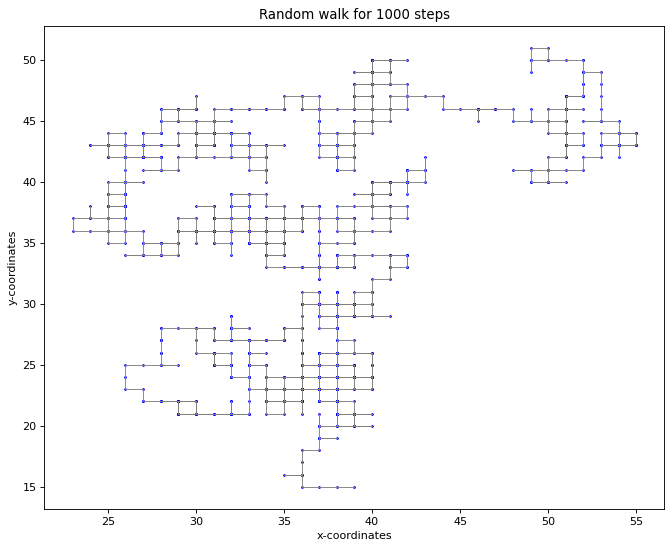


 Particle hitted the wall for 0 number of times in 1000 steps.



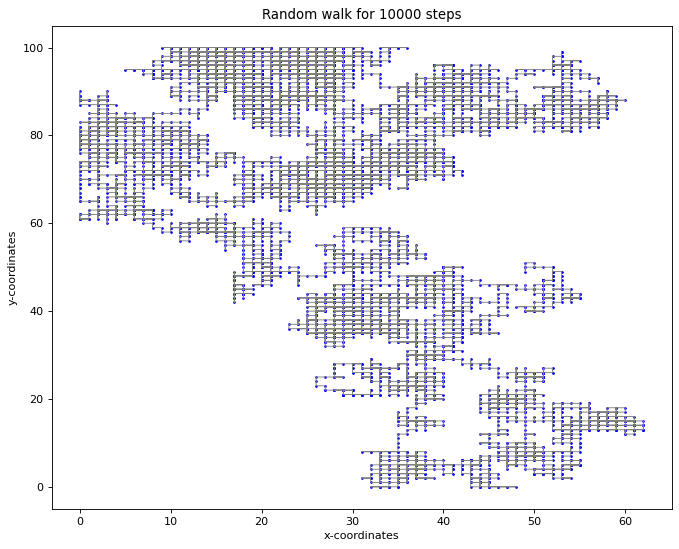


 Particle hitted the wall for 291 number of times in 10000 steps.



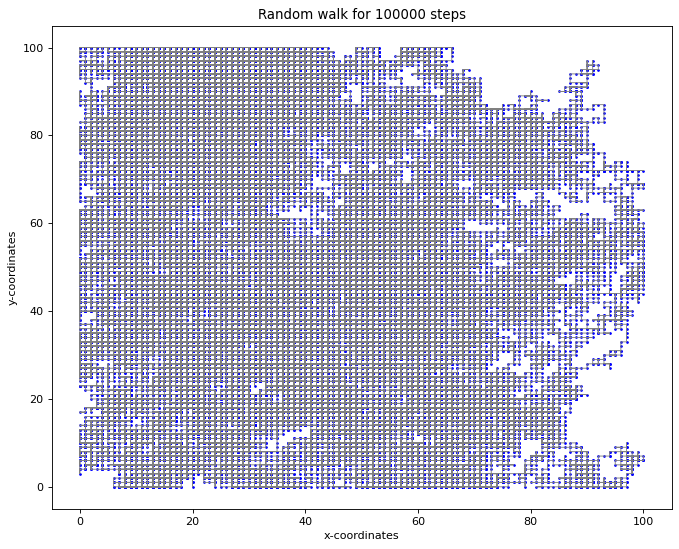


 Particle hitted the wall for 1929 number of times in 100000 steps.



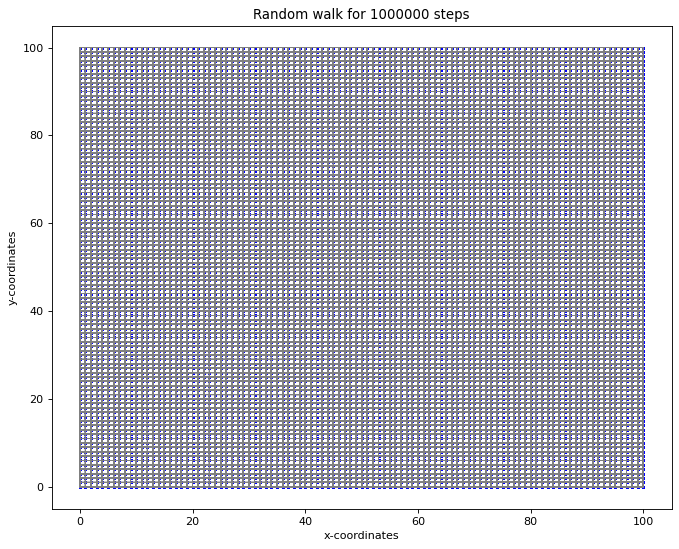


 Particle hitted the wall for 27316 number of times in 1000000 steps.



In [9]:
%timeit

L = 101 #No. of squares in the grid in one dimension

N = int(1e6) #Given number of steps = a million


# For grid of L x L squares
xs = np.arange(0,L,1) # position in X-direction
ys = np.arange(0,L,1) # position in Y-direction

mid_pos = int((min(xs)+max(xs))/2) # middle of the grid
boundaries = np.array([0,100]) 

#direction = ['right', 'left','up', 'down']
direction = [0,1,2,3]       

# Array of m for 10^{m} for N movements plotting purpose 
powers = [int(1e3),int(1e4),int(1e5), int(1e6)]
#print(powers)

# History of coordinates for random walk of particle
xhistory = np.array([])
yhistory = np.array([])

# x,y coordinates of starting Point 
i,j = mid_pos, mid_pos # x-index, y-index


# Append initial positions
xhistory = np.append(xhistory, i)
yhistory = np.append(yhistory, j)
    
hit_count = 0 # No. of times particle hits the wall

# Take first step
i,j = move(i,j, direction)
        
# Loop to check boundary conditions and accordingly decide next allowed directions.    
for itr in range(N):
        
    # Case 1: Particle within Boundaries    
    if ((i>0) and (i<100) and (j>0) and (j<100)):
        xhistory = np.append(xhistory, i)
        yhistory = np.append(yhistory, j)
        i,j = move(i,j, direction)

    # Case 2: Particle on the corners of the LxL grid    
    elif (i in [0,100]) and (j in [0,100]):
        xhistory = np.append(xhistory, i)
        yhistory = np.append(yhistory, j)
        hit_count +=1 
        
        if (i ==0) and (j==0):
            #allowed_dir = ["right", "up"]
            allowed_dir = [0, 2]
            i,j = move(i,j, allowed_dir)
        elif (i ==100) and (j==100):
            #allowed_dir = ["left", "down"]
            allowed_dir = [1, 3]
            i,j = move(i,j, allowed_dir)
        elif (i == 0) and (j==100):
            #allowed_dir = ["right", "down"]
            allowed_dir = [0, 3]
            i,j = move(i,j, allowed_dir)
        elif (i ==100) and (j==0):
            #allowed_dir = ["left", "up"]
            allowed_dir = [1, 2]
            i,j = move(i,j, allowed_dir)
        
            
        
    # Case 3: Particle on the sides of LxL grid
    elif (i == 0) and (j in range(1,100,1)):
        xhistory = np.append(xhistory, i)
        yhistory = np.append(yhistory, j)
        
        #allowed_dir = ["right", "up", "down"]
        allowed_dir = [0, 2,3]
            
        i,j = move(i,j, allowed_dir)
        hit_count +=1 
        
    elif (i == 100) and (j in range(1,100,1)):
        xhistory = np.append(xhistory, i)
        yhistory = np.append(yhistory, j)
        
        #allowed_dir = ["left", "up", "down"]
        allowed_dir = [1, 2,3]
        
        i,j = move(i,j, allowed_dir)
        hit_count +=1 
    elif (j ==0) and (i in range(1,100,1)):
        xhistory = np.append(xhistory, i)
        yhistory = np.append(yhistory, j)
        
        #allowed_dir = ["right", "up", "left"]
        allowed_dir = [0, 1, 2]
        
        i,j = move(i,j, allowed_dir)
        hit_count +=1 
        
    elif (j == 100) and (i in range(1,100,1)):
        xhistory = np.append(xhistory, i)
        yhistory = np.append(yhistory, j)
        
        #allowed_dir = ["right", "down", "left"]
        allowed_dir = [0,1,3]
        
        i,j = move(i,j, allowed_dir)
        hit_count +=1 
        
        
        
    
    # Plot data    
    if itr+1 in powers:
        #print(itr)
        fig = plt.figure(figsize=(10, 8), dpi=80)
        plt.scatter(xhistory,yhistory, color='blue', s=2)
        plt.plot(xhistory,yhistory, color='gray', linewidth =0.8)
        plt.xlabel("x-coordinates")
        plt.ylabel("y-coordinates")
        plt.title(f"Random walk for {itr+1} steps")
        plt.show()
        #print(itr)
        print(f"\n Particle hitted the wall for {hit_count} number of times in {itr+1} steps.\n")
       
    